<a href="https://colab.research.google.com/github/idnm/local_minimums/blob/master/local_minimums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

!git clone https://github.com/idnm/local_minimums
!cp -r /content/local_minimums/data /content

fatal: destination path 'local_minimums' already exists and is not an empty directory.


This will load results for one of four datasets: random self instance/random unitaries for 3q/4q circuits.

In [7]:
results_paths = [
    '3q_random_self_rs',
    '3q_random_unitary_rs',
    '4q_random_self_rs',
    '4q_random_unitary_rs'
]

def load_dataset(n):
    assert 0<=n<=3, 'There are only four datasets'
    results = []
    for i in range(10):
        with open(f'data/{results_paths[n]}{i}', 'rb')  as f:
            results.append(pickle.load(f))
    return results

Here is the code to reproduce any of the charts from the paper.

Text(0.5, 0, 'Number of CZ gates')

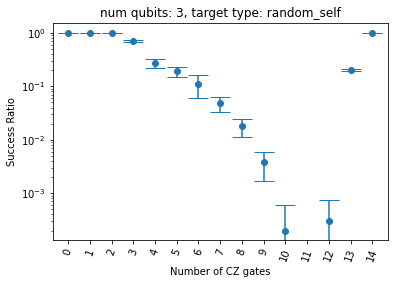

In [8]:
def mean_and_std(results):
    mean_list = []
    std_list = []
    for i in range(len(results[0])):
        sr_list = np.array([res[i]['success_ratio'] for res in results])
        mean_list.append(np.mean(sr_list))
        std_list.append(np.std(sr_list))
    
    return mean_list, std_list    


# Change index to plot a different dataset.
results = load_dataset(0)

# Compute mean and standard deviation at each gate count      
mean_list, std_list = mean_and_std(results)

# Do the plotting.
plt.errorbar(range(len(mean_list)), mean_list, yerr=std_list, fmt='o', capsize=10);

plt.title(f"num qubits: {results[0][0]['num_qubits']}, target type: {results[0][0]['target_type']}")
plt.yscale('log')
plt.xticks(range(len(mean_list)), rotation=70)
plt.ylabel('Success Ratio')
plt.xlabel('Number of CZ gates')

Here let's look at a single point from such a dataset: with a fixed target and fixed number of CZ gates.

In [9]:
dataset_i = 3  # Choose a dataset
target_index = 2 # Choose one of ten targets
x_index = 4 # Choose gate count. Index is equal to gate count for 3q circuits, and equal to gate count times 3 for 4q circuits.
res = load_dataset(dataset_i)[target_index][x_index]

print('num qubits:', res['num_qubits'])
print('template gate count:', res['num_cz_gates'])
print('success ratio:', res['success_ratio'])
all_best_losses = res['losses']
all_best_losses = [float(l) for l in all_best_losses]

num qubits: 4
template gate count: 12
success ratio: 0.001


List `all_best_losses` contains a list of all minimal losses that were reached for a 1000 initial conditions. Below we plot a sample histogram and specify how the success ratio was computed.

succes ratio :0.001


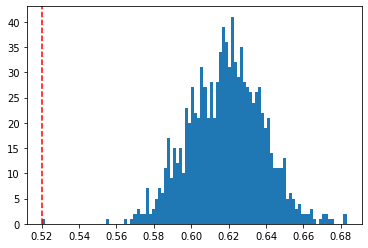

In [10]:
loss_cutoff = 1e-4

best_loss_overall = min(all_best_losses)

# Loss theshold is defined as the best overall loss (possibly the global minumum) + a small value
loss_threshold = best_loss_overall+loss_cutoff

# Success ratio is the number of losses below the loss thrshold.
success_ratio = sum(np.array(all_best_losses) < loss_threshold)/len(all_best_losses)
print(f'succes ratio :{success_ratio}')
plt.axvline(loss_threshold, color='red', linestyle='--')
plt.hist(all_best_losses, bins=100);